In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import mannwhitneyu, normaltest
f1='/Users/irffanalahi/Research/Research_update/SoftRD/hashtable_stats/tieredApproach/rankspace_idea/GSEA_run/Bugfixed/othertest/comapre/Tregs_CpGdelta_info_faster.txt_fullinfo_SMtr51unique.txt'
f2='/Users/irffanalahi/Research/Research_update/SoftRD/hashtable_stats/tieredApproach/rankspace_idea/GSEA_run/Bugfixed/othertest/comapre/Tregs_CpGdelta_info_faster.txt_V1hypo_rankedtop5000_head513.txt_comparedunique.txt'

groupinfo=['Tcell','Myloid','PMNlike','Bcell']


df1=pd.read_csv(f1,sep='\t')
df1['SM']='overfit'
df2=pd.read_csv(f2,sep='\t')
df2['SM']='RankedV1 with hypo parameter'
df1.head()

,chrom,start,end,Tregs-Bcell,Tregs-Myloid,Tregs-NK,Tregs-NaiveCD4,Tregs-NaiveCD8,Tregs-PMNlike,Tregs-cm4,...,OtherGroup_avg_delta,OwnGroup_avg_delta rank,OtherGroup_avg_delta rank,(OwnGroup_avg_delta rank+OtherGroup_avg_delta rank)/2,(OwnGroup_avg_delta rank+Average delta rank)/2,Methylation rank,(Methylation rank+OtherGroup_avg_delta rank+OwnGroup_avg_delta rank)/3,(Methylation rank+Average delta rank+OwnGroup_avg_delta rank)/3,(Methylation rank+Average delta rank+Minimum delta rank)/3,SM
0,chr1,12128144,12128146,0.405250,0.243000,0.658167,0.596833,0.645833,0.481611,0.3805,...,0.376620,968.0,26442.0,13705.0,2247.0,1009.0,9473.000000,1834.333333,2170.000000,overfit
1,chr1,12128203,12128205,0.465500,0.248625,0.697167,0.664167,0.676500,0.552500,0.5190,...,0.422208,349.0,21483.0,10916.0,915.5,844.0,7558.666667,891.666667,1403.333333,overfit
2,chr1,12170596,12170598,0.759625,0.052000,0.780167,0.831500,0.831500,0.775611,0.7175,...,0.529079,64.0,12822.0,6443.0,141.0,580.0,4488.666667,287.333333,4545.333333,overfit
3,chr1,23192829,23192831,0.532500,0.747313,0.685167,0.638833,0.800833,0.720389,0.2015,...,0.666734,1032.0,5523.0,3277.5,1073.5,598.0,2384.333333,915.000000,1497.333333,overfit
4,chr1,24935787,24935789,0.450250,0.696750,0.722833,0.669833,0.703167,0.687833,0.3715,...,0.611611,658.0,8046.0,4352.0,828.5,879.0,3194.333333,845.333333,846.000000,overfit


In [2]:
def renamect(act):
    if act=='CD4':
        return 'Naive CD4 T'
    if act=='CD8':
        return 'Naive CD8 T'

    if act=='NaiveCD4':
        return 'Naive CD4 T'
    if act=='NaiveCD8':
        return 'Naive CD8 T'
    if act=='Tr':
        return 'Tregs'
    if act=='mB':
        return 'Memory B'
    if act=='nB':
        return 'Naive B'
    if act=='m4':
        return 'Memory CD4 T'
    if act=='m8':
        return 'Memory CD8 T'
    if act=='Mn':
        return 'Mono'


    if act=='em8':
        return 'CD8 TEM'
    if act=='cm8':
        return 'CD8 TCM'

    if act=='em4':
        return 'CD4 TEM'
    if act=='cm4':
        return 'CD4 TCM'


    if act=='ed8':
        return 'CD8 TEMRA'

    if act=='PC':
        return 'PC'

    if act=='M0':
        return 'Macrophage (M0)'

    if act=='M1':
        return 'Macrophage (M1)'

    if act=='M2':
        return 'Macrophage (M2)'
    if act=='Eo':
        return 'Eosinophil'
    if act=='Mg':
        return 'Megakaryocyte'




    return act

In [3]:
df1.shape

(173, 54)

In [4]:
mergedDF = pd.concat([df1, df2], axis=0)
mergedDF.shape

(418, 54)

In [5]:
#mergedDF['col'] = (len(df1)*(0,) + len(df2)*(1,))
mergedDF.shape

(418, 54)

In [6]:
mergedDF

,chrom,start,end,Tregs-Bcell,Tregs-Myloid,Tregs-NK,Tregs-NaiveCD4,Tregs-NaiveCD8,Tregs-PMNlike,Tregs-cm4,...,OtherGroup_avg_delta,OwnGroup_avg_delta rank,OtherGroup_avg_delta rank,(OwnGroup_avg_delta rank+OtherGroup_avg_delta rank)/2,(OwnGroup_avg_delta rank+Average delta rank)/2,Methylation rank,(Methylation rank+OtherGroup_avg_delta rank+OwnGroup_avg_delta rank)/3,(Methylation rank+Average delta rank+OwnGroup_avg_delta rank)/3,(Methylation rank+Average delta rank+Minimum delta rank)/3,SM
0,chr1,12128144,12128146,0.405250,0.243000,0.658167,0.596833,0.645833,0.481611,0.3805,...,0.376620,968.0,26442.0,13705.0,2247.0,1009.0,9473.000000,1834.333333,2170.000000,overfit
1,chr1,12128203,12128205,0.465500,0.248625,0.697167,0.664167,0.676500,0.552500,0.5190,...,0.422208,349.0,21483.0,10916.0,915.5,844.0,7558.666667,891.666667,1403.333333,overfit
2,chr1,12170596,12170598,0.759625,0.052000,0.780167,0.831500,0.831500,0.775611,0.7175,...,0.529079,64.0,12822.0,6443.0,141.0,580.0,4488.666667,287.333333,4545.333333,overfit
3,chr1,23192829,23192831,0.532500,0.747313,0.685167,0.638833,0.800833,0.720389,0.2015,...,0.666734,1032.0,5523.0,3277.5,1073.5,598.0,2384.333333,915.000000,1497.333333,overfit
4,chr1,24935787,24935789,0.450250,0.696750,0.722833,0.669833,0.703167,0.687833,0.3715,...,0.611611,658.0,8046.0,4352.0,828.5,879.0,3194.333333,845.333333,846.000000,overfit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,chr12,12528812,12528814,0.883250,0.873687,0.873667,0.482000,0.381500,0.859556,0.4120,...,0.872164,1021.0,377.0,699.0,710.5,231.0,543.000000,550.666667,674.666667,RankedV1 with hypo parameter
241,chr6,62136442,62136444,0.422667,0.651923,0.708500,0.750000,0.604667,0.580000,0.5990,...,0.551530,351.0,11403.0,5877.0,575.5,838.0,4197.333333,663.000000,679.000000,RankedV1 with hypo parameter
242,chrX,49259339,49259341,0.389714,0.684875,0.754000,0.688000,0.641000,0.685667,0.7170,...,0.586752,581.0,9373.0,4977.0,801.5,379.0,3444.333333,660.666667,681.333333,RankedV1 with hypo parameter
243,chr3,190586137,190586139,0.637625,0.791125,0.805333,0.761333,0.767667,0.798333,0.4105,...,0.742361,718.0,2743.0,1730.5,644.0,545.0,1335.333333,611.000000,682.000000,RankedV1 with hypo parameter


In [7]:
#scorecol=['Tregs-Naive CD4 T','Tregs-CD4 TCM','Tregs-CD4 TEM','Tregs-Naive CD8 T','Tregs-CD8 TCM','Tregs-CD8 TEM','Tregs-CD8 TEMRA','SM']
incolnames=(df1.columns).tolist()
scorcols=[s for s in incolnames if '-' in s]


In [8]:
outgroupcols=[]
for gr in groupinfo:
     outgroupcols=outgroupcols+[s for s in scorcols if gr in s]

print(outgroupcols)
owngroupcols=list(set(scorcols)-set(outgroupcols))
print(owngroupcols)



['Tregs-Myloid', 'Tregs-PMNlike', 'Tregs-Bcell']
['Tregs-cm8', 'Tregs-ed8', 'Tregs-em8', 'Tregs-NK', 'Tregs-cm4', 'Tregs-NaiveCD8', 'Tregs-NaiveCD4', 'Tregs-em4']


In [9]:
newscorecols=[]
score_rename_dict={}
for score in owngroupcols:
    scoreplit=score.split("-")
    c1=renamect(scoreplit[0])
    c2=renamect(scoreplit[1])
  
    newscorename=c1+"-"+c2
    score_rename_dict[score]=newscorename
    
    newscorecols.append(newscorename)
    
score_rename_dict  

{'Tregs-cm8': 'Tregs-CD8 TCM',
 'Tregs-ed8': 'Tregs-CD8 TEMRA',
 'Tregs-em8': 'Tregs-CD8 TEM',
 'Tregs-NK': 'Tregs-NK',
 'Tregs-cm4': 'Tregs-CD4 TCM',
 'Tregs-NaiveCD8': 'Tregs-Naive CD8 T',
 'Tregs-NaiveCD4': 'Tregs-Naive CD4 T',
 'Tregs-em4': 'Tregs-CD4 TEM'}

In [10]:
allcols=owngroupcols+outgroupcols+['SM']

In [11]:
subset=mergedDF[allcols].copy()

In [12]:
subset.rename(columns=score_rename_dict,inplace=True)
subset.head()

,Tregs-CD8 TCM,Tregs-CD8 TEMRA,Tregs-CD8 TEM,Tregs-NK,Tregs-CD4 TCM,Tregs-Naive CD8 T,Tregs-Naive CD4 T,Tregs-CD4 TEM,Tregs-Myloid,Tregs-PMNlike,Tregs-Bcell,SM
0,0.5725,0.6260,0.6265,0.658167,0.3805,0.645833,0.596833,0.4915,0.243000,0.481611,0.405250,overfit
1,0.6820,0.6575,0.6735,0.697167,0.5190,0.676500,0.664167,0.5450,0.248625,0.552500,0.465500,overfit
2,0.7980,0.6260,0.8100,0.780167,0.7175,0.831500,0.831500,0.5930,0.052000,0.775611,0.759625,overfit
3,0.5765,0.6010,0.6320,0.685167,0.2015,0.800833,0.638833,0.4245,0.747313,0.720389,0.532500,overfit
4,0.4905,0.7330,0.6215,0.722833,0.3715,0.703167,0.669833,0.4820,0.696750,0.687833,0.450250,overfit


In [13]:
df_melted = pd.melt(subset,'SM')
labels = np.unique(df_melted['SM'])
df_melted.head(10)

,SM,variable,value
0,overfit,Tregs-CD8 TCM,0.5725
1,overfit,Tregs-CD8 TCM,0.6820
2,overfit,Tregs-CD8 TCM,0.7980
3,overfit,Tregs-CD8 TCM,0.5765
4,overfit,Tregs-CD8 TCM,0.4905
5,overfit,Tregs-CD8 TCM,0.4120
6,overfit,Tregs-CD8 TCM,0.6445
7,overfit,Tregs-CD8 TCM,0.6180
8,overfit,Tregs-CD8 TCM,0.4785
9,overfit,Tregs-CD8 TCM,0.4170


In [14]:
pairs = []
p_val_dic = {}
for cell in np.unique(df_melted['variable']):
    df_sub = df_melted[df_melted['variable'] == cell]
    v1 = np.array(df_sub[df_sub['SM'] == labels[0]]['value'])
    v2 = np.array(df_sub[df_sub['SM'] == labels[1]]['value'])
    res = mannwhitneyu(v1, v2, alternative="two-sided")
    p_val = res.pvalue
    p_val_dic[cell] = [p_val]
    pairs.append([(cell, labels[0]), (cell, labels[1])])
df_pvals = pd.DataFrame.from_dict(p_val_dic, orient='index', columns=['p-val'])
display(df_pvals)
df_pvals.to_csv(f1+'_plot1_pvals.txt', sep='\t')

,p-val
Tregs-Bcell,3.157300e-10
Tregs-CD4 TCM,1.848218e-23
Tregs-CD4 TEM,8.797781e-01
Tregs-CD8 TCM,4.892593e-04
Tregs-CD8 TEM,4.412117e-17
Tregs-CD8 TEMRA,3.532757e-13
Tregs-Myloid,1.971008e-18
Tregs-NK,7.010856e-04
Tregs-Naive CD4 T,3.903732e-17
Tregs-Naive CD8 T,1.375670e-06


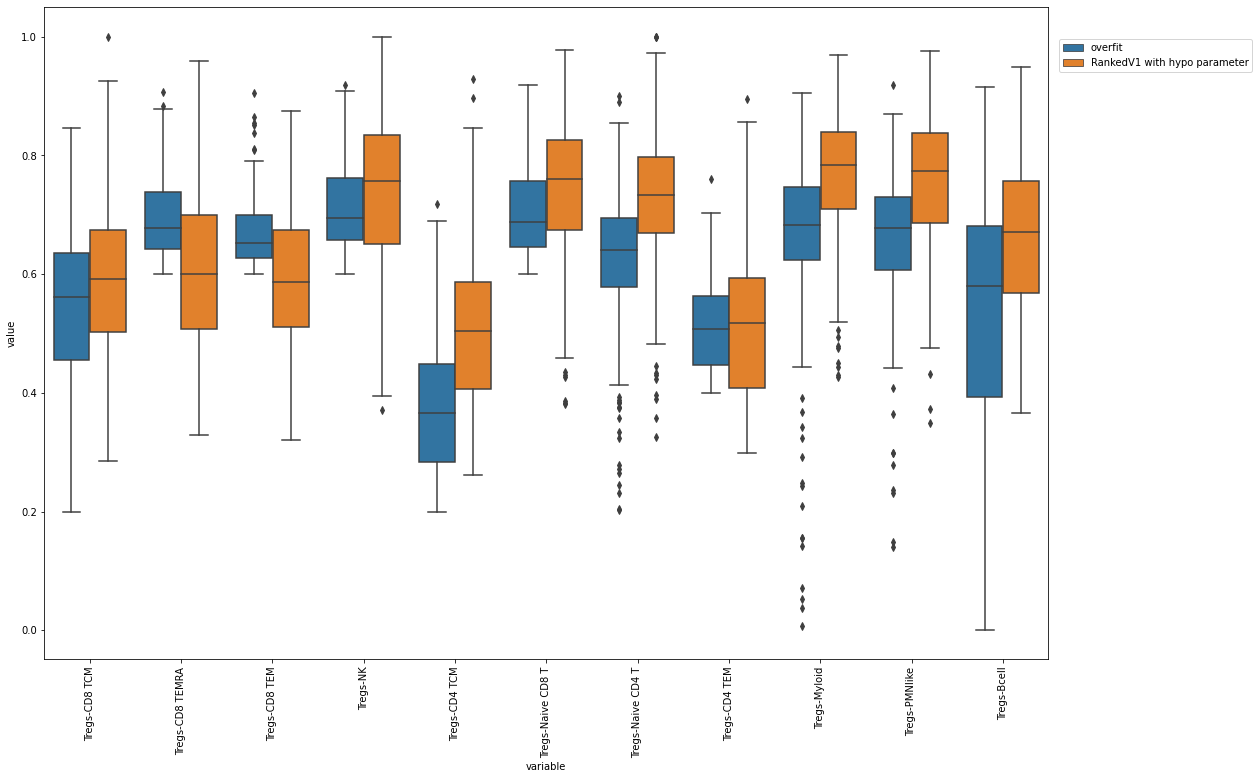

In [15]:
from statannotations.Annotator import Annotator
import matplotlib.pyplot as plt
hue_plot_params = {
    'data': df_melted,
    'x': 'variable',
    'y': 'value',
    "hue": "SM",
}
fig, ax = plt.subplots(1, 1, figsize=(18, 12))
ax=sns.boxplot(ax=ax, **hue_plot_params)
annotator = Annotator(ax, pairs, **hue_plot_params)
#annotator.configure(test="Mann-Whitney", text_format='full').apply_and_annotate()
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.legend(loc=(1.01, 0.9))
plt.savefig(f1+'_plot1.pdf', bbox_inches='tight')